# Ford GoBike Data Exploration
## by Prashant Kumar

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States.

> It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company.

> The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.
> As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers

In [66]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [67]:
# load in the dataset into a pandas dataframe, print statistics
df=pd.read_csv('201908-baywheels-tripdata.csv')

In [68]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(210563, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         68145  2019-08-31 21:27:42.2530  2019-09-01 16:23:27.4920   
1         53216  2019-08-31 22:34:17.5120  2019-09-01 13:21:13.9310   
2         53182  2019-08-31 22:34:49.9420  2019-09-01 13:21:12.4570   
3         75682  2019-08-31 14:22:02.2780  2019-09-01 11:23:24.5110   
4         30849  2019-08-31 18:47:08.0570  2019-09-01 03:2

In [69]:
#Having a look at the column names 
df.columns

Index([u'duration_sec', u'start_time', u'end_time', u'start_station_id',
       u'start_station_name', u'start_station_latitude',
       u'start_station_longitude', u'end_station_id', u'end_station_name',
       u'end_station_latitude', u'end_station_longitude', u'bike_id',
       u'user_type', u'member_birth_year', u'member_gender',
       u'bike_share_for_all_trip'],
      dtype='object')

In [70]:
# What about NaN values?
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          39789
member_gender              39786
bike_share_for_all_trip        0
dtype: int64

In [71]:
#Making a copy of the data
df_cleaned = df.copy()

In [72]:
#Changing the start_timeand end_time to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)
#Changing the bike_id, start_station_id, and end_station_id to str
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)
#Changing the user_type and member_gender to category format
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.member_gender = df_cleaned.member_gender.astype('category')

### What is the structure of your dataset?

There are 210563 trips in the dataset with 16 features(duration_sec,start_time, end_time, start_station_id,start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id,user_type, member_birth_year, member_gender,bike_share_for_all_trip.The datatypes for diffrent columns are int,float or object.Most the columns does not contain any null value except for member birth year and member_gender.

### What is/are the main feature(s) of interest in your dataset?

My main interest is in finding what features that affect the rise in rental rides. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the loaction of bike staion,user_type,member_birth_year,member_gender will help me the most in finding my feature of interest.I can plot these columns as univariate ,bivariate or multi variate to bring up some meaningful result.

## Univariate Exploration

In [73]:
#Filter data to include reasonable member age range
df_cleaned['member_age'] = 2019-df_cleaned['member_birth_year']

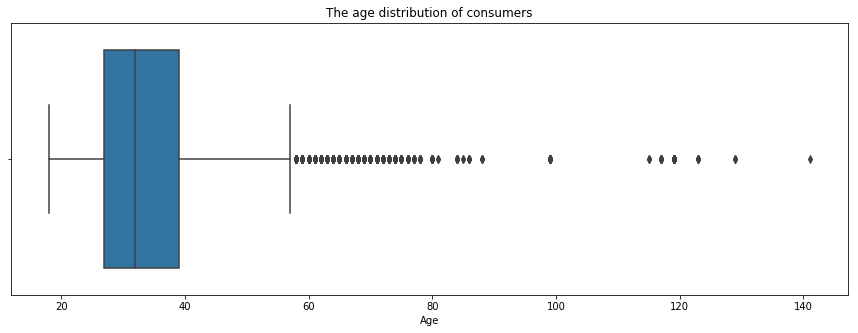

In [74]:
plt.figure(figsize=(15,5))
sns.boxplot(x='member_age', data=df_cleaned)
plt.title("The age distribution of consumers", y=1);
plt.xlabel("Age");

**From the box plot above we can see that the minimum age for renting the bike is 18 yeras.75% of people taking ride are below 40 years of age**

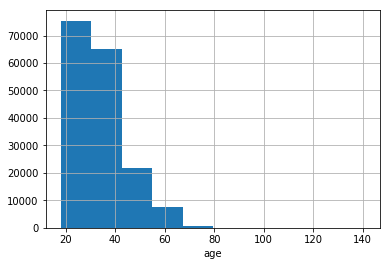

In [75]:
fig = plt.figure()
df_cleaned['member_age'].hist();
plt.xlabel('age');


**The histogram above shown is right skewed.Maximum peole taking ride are around 18 to 30 years of age.People above 60 years of age are taking rides very rarely**

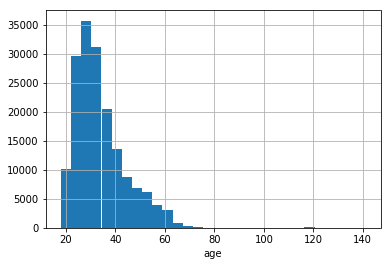

In [76]:
df_cleaned['member_age'].hist(bins=30);
plt.xlabel('age');


**When we increase the bin size then we can have a look at the tail of the histogram.The histogram is right tailed.**

833.5147200600295

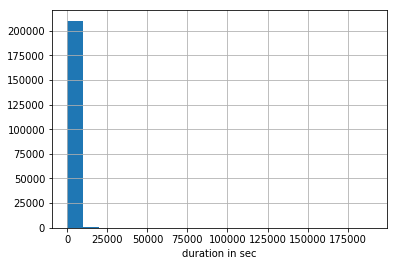

In [77]:
bin_edges = np.arange(0, 200000, 10000)
df_cleaned['duration_sec'].hist(bins=bin_edges) ;
plt.xlabel('duration in sec');
df_cleaned['duration_sec'].mean()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The histogram above shown is right skewed.Maximum peoole taking ride are around 18 to 30 years of age.People above 60 years of age are taking rides very rarely.

In the plot the only unusual thing which I can see is that people around 20 years of age are taking comparatevely less rides.<br>
In order to make the histogram with age I had to fetch the age from the date of birth i.e from the column member_birth_year.

## Bivariate Exploration

### What is the approx. duration for the trips ?

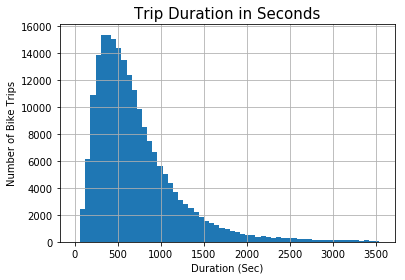

In [78]:
# Duration of the bike rides(seconds)
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df_cleaned, x = 'duration_sec', bins = bin_edges);

plt.title("Trip Duration in Seconds", y=1, fontsize=15)
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');
plt.grid()

**The above plot shows trip duration vs Number of bikes.From the plot we can conclude that maximum trips on an average have a duration of around 450 to 550**

### On which days of the week people take maximum ride ?

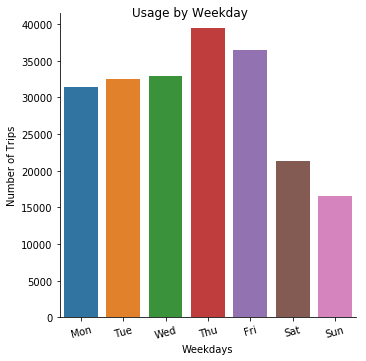

In [79]:
# Weekday usage of the bike system
df_cleaned['weekday'] = df_cleaned['start_time'].dt.strftime('%a')
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plot = sns.catplot(data=df_cleaned, x='weekday', kind='count', order = weekday);
plot.fig.suptitle('Usage by Weekday');
plot.set_xticklabels(rotation=15);
plot.set_axis_labels('Weekdays', 'Number of Trips');


**We can see above that on thusday and fri we have maximum trips and is minimum on sunday.**

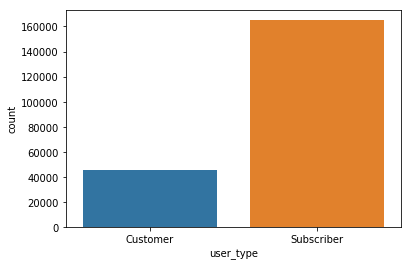

In [80]:
sns.countplot(data = df_cleaned, x = 'user_type');


**The number of subscribers is way more than number of customers.The number of susscribers is around 160000 where as customers are only 40000 which is a huge difference**

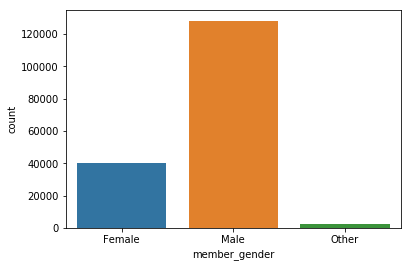

In [81]:
sns.countplot(data = df_cleaned, x = 'member_gender');


**The number of male riders are maximum,then comes females and others are least**

### What is the ratio of users of different gender?

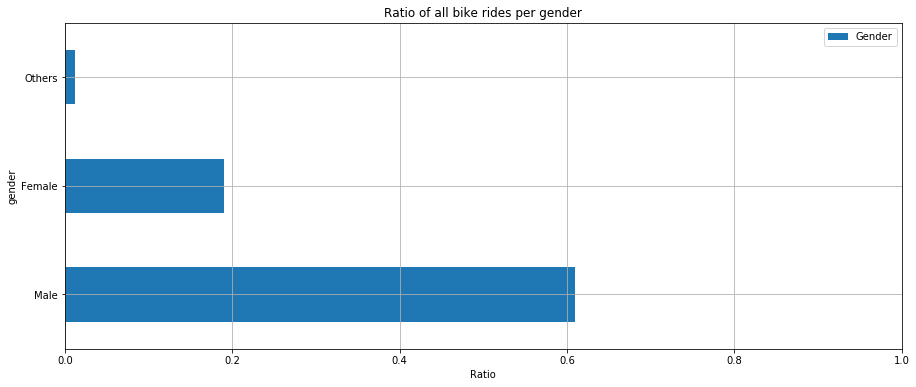

In [90]:
male_ratio=df_cleaned.query('member_gender=="Male"').count()/df_cleaned.shape[0]
female_ratio=df_cleaned.query('member_gender=="Female"').count()/df_cleaned.shape[0]
other_ratio=df_cleaned.query('member_gender=="Other"').count()/df_cleaned.shape[0]
#female_ratio=df_cleaned.query('member_gender=="Other"').count()/df_cleaned.shape[0]

per_list=[male_ratio[0],female_ratio[0],other_ratio[0]]
temp=pd.DataFrame(per_list) 
temp['gender']=['Male','Female','Others']
temp.set_index("gender", inplace = True)
temp.rename(columns={0:'Gender'}, inplace=True)
temp.plot(kind='barh',figsize=(15,6))
plt.title('Ratio of all bike rides per gender')
plt.xlabel('Ratio')
plt.xlim(0,1)
plt.grid()


### Where are the bike stations available?

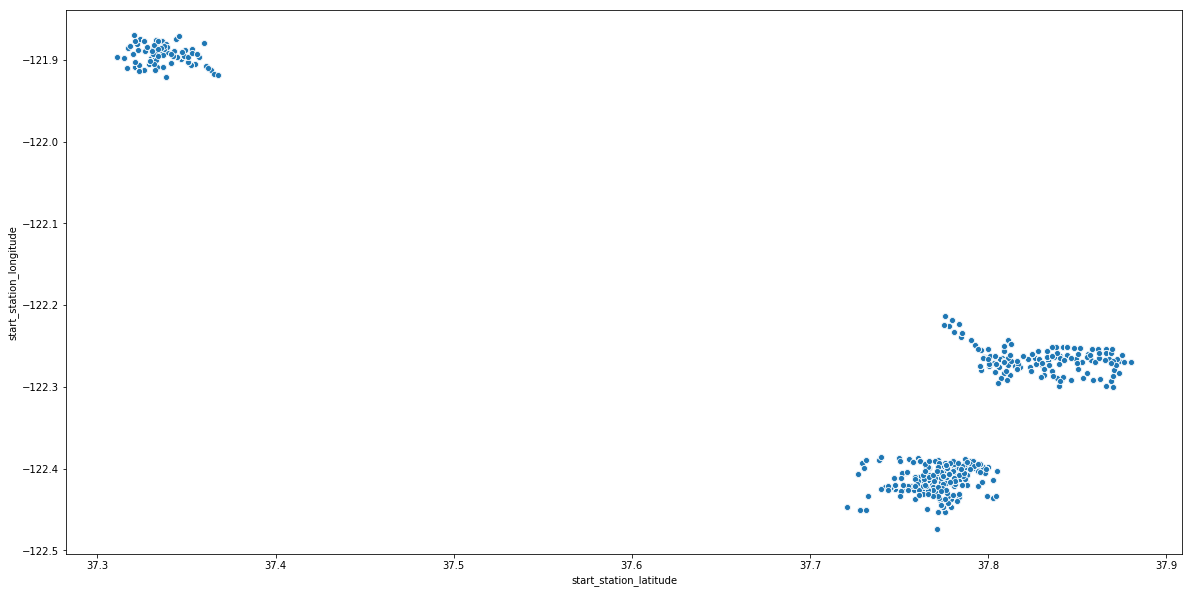

In [24]:
plt.figure(figsize=(20,10))
temp=df_cleaned[df_cleaned['start_station_latitude']<44]
sns.scatterplot(temp['start_station_latitude'], temp['start_station_longitude']);


**The plot above shows the Bike stations are normally centralized in 3 parts of the city ie at co-ordinates (37.,-121.9),(37.8,-122.4),(37.8,-122.3)**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The number of rides taken depends significantly on the gender of the member.Male people are found to take more rides(>60%) as compared
to females and others.The number of rides taken also depend on the user type subscribers are found to take more rides as compared to customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The plot above shows the Bike stations are normally centralized in 3 parts of the city ie at co-ordinates (37.,-121.9),(37.8,-122.4),(37.8,-122.3).

## Multivariate Exploration

### Gender wise users for the Bike company ?

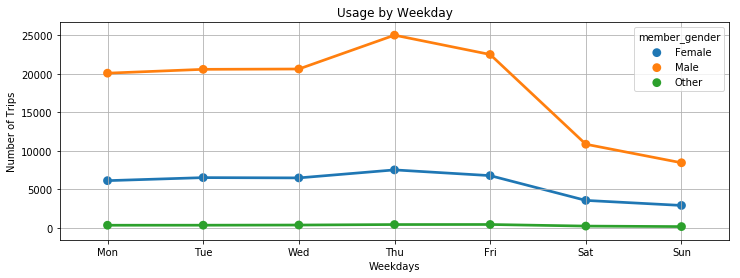

In [21]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=[ 12, 4]);

df_cleaned_user_week = df_cleaned.groupby(['weekday', 'member_gender']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=df_cleaned_user_week, x='weekday', y=0, hue = 'member_gender', order = weekday);

plt.title('Usage by Weekday');
plt.xlabel('Weekdays')
plt.ylabel('Number of Trips');
plt.grid()

**The bar plot above shows male takes maximum trips then female then others.In fact others are taking very less rides.**

### Trips based on user_type ?

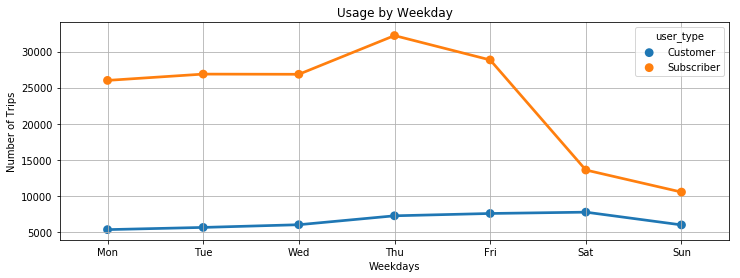

In [22]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=[ 12, 4]);

df_cleaned_user_week = df_cleaned.groupby(['weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=df_cleaned_user_week, x='weekday', y=0, hue = 'user_type', order = weekday);

plt.title('Usage by Weekday');
plt.xlabel('Weekdays')
plt.ylabel('Number of Trips');
plt.grid()

**The plot above shows the subscribers takes way more rides than normal consumers.**

C:\Users\ptkr\AppData\Local\Continuum\anaconda_2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


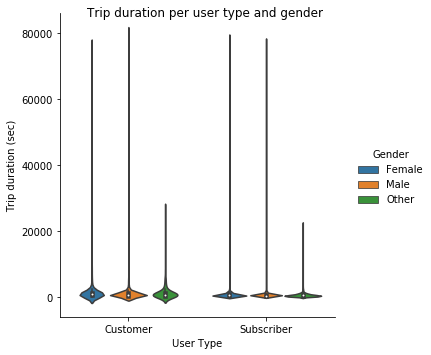

In [25]:
g = sns.catplot(data=df_cleaned, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender');

**The plot above shows the Trip duration per user type and gender.From the plot we can see male people who are consumers are are taking maximum rides.In case of subscribers male and female are taking almost equal rides.**

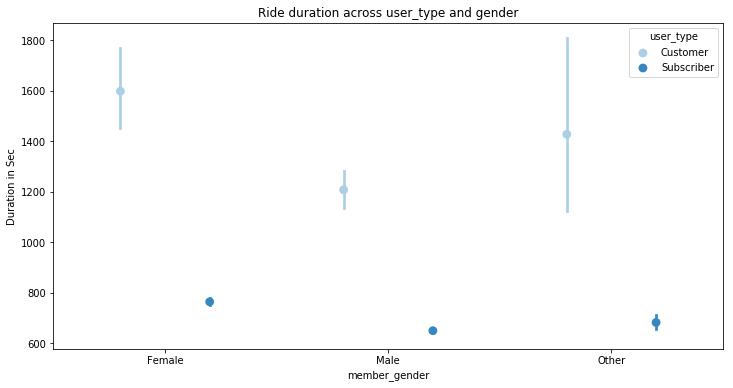

In [39]:
ig = plt.figure(figsize = [12,6])
ax = sns.pointplot(data = df_cleaned, x = 'member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Ride duration across user_type and gender')
plt.ylabel('Duration in Sec')
ax.set_yticklabels([],minor = True)
plt.show();

**The plot above shows customers take longer rides as compared to subscribers.Out of Customers others are taking longest duration ride then female and male.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of number of trips against user_type and day of the week.After the observation I could see that out of subscribers the maximum number of trips are taken on thursdays while among the consumers the maximum number of trips are taken on saturdays.I also made investigation of number of trips against gender and day of week.Here,I could see all the male ,females and others are taking maximum rides on thursday.

### Were there any interesting or surprising interactions between features?
The interesting feature I could see that most of the people are taking maximum number of rides on thursday and minimum of rides on sunday.